In [26]:
import os
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt


base_path = Path("results/hpp_clustering/")
SUFFIX = "-stats.pt"
headers = ["n-sect", "n-sen", "min-sen", "max-sen", "avg-sim", "min-avg", "max-avg", "std-sim", "min-std", "max-std", "avg-min", "min-min", "avg-max", "max-max"]
# load stats
stats = {}
for file in os.listdir(base_path):
    if file.endswith(SUFFIX):
        stats[file[:-len(SUFFIX)]] = torch.load(base_path / file)

In [27]:
# table of stats
print(*headers, sep='\t')
for k, v in stats.items():
    print(k, end="\n")
    [print(f"{np.mean(i):0.4f}", end="\t") for i in v]
    print("")
    [print(f"{np.std(i):0.4f}", end="\t") for i in v]


n-sect	n-sen	min-sen	max-sen	avg-sim	min-avg	max-avg	avg-min	avg-max
pubmed_val-True-none-cos
5.1027	16.5609	5.0382	34.5655	0.9364	0.9084	0.9604	0.7801	0.9919	
2.1264	12.2808	7.7627	27.1931	0.0146	0.0361	0.0197	0.0542	0.0120	pubmed_val-True-random-cos
5.0988	16.5638	12.4802	20.8910	0.9942	0.9934	0.9949	0.9904	0.9972	
2.1265	12.2778	11.5242	13.4233	0.0006	0.0008	0.0008	0.0011	0.0008	pubmed_val-True-spectralcos-cos
5.1027	16.5609	8.3473	25.9335	0.9843	0.9751	0.9906	0.9403	0.9980	
2.1264	12.2808	8.0346	18.3004	0.0073	0.0094	0.0078	0.0329	0.0016	pubmed_val-True-spectralrbf-cos
5.1027	16.5609	7.7085	29.8294	0.9939	0.9926	0.9952	0.9908	0.9964	
2.1264	12.2808	10.3884	17.2759	0.0006	0.0010	0.0008	0.0011	0.0010	

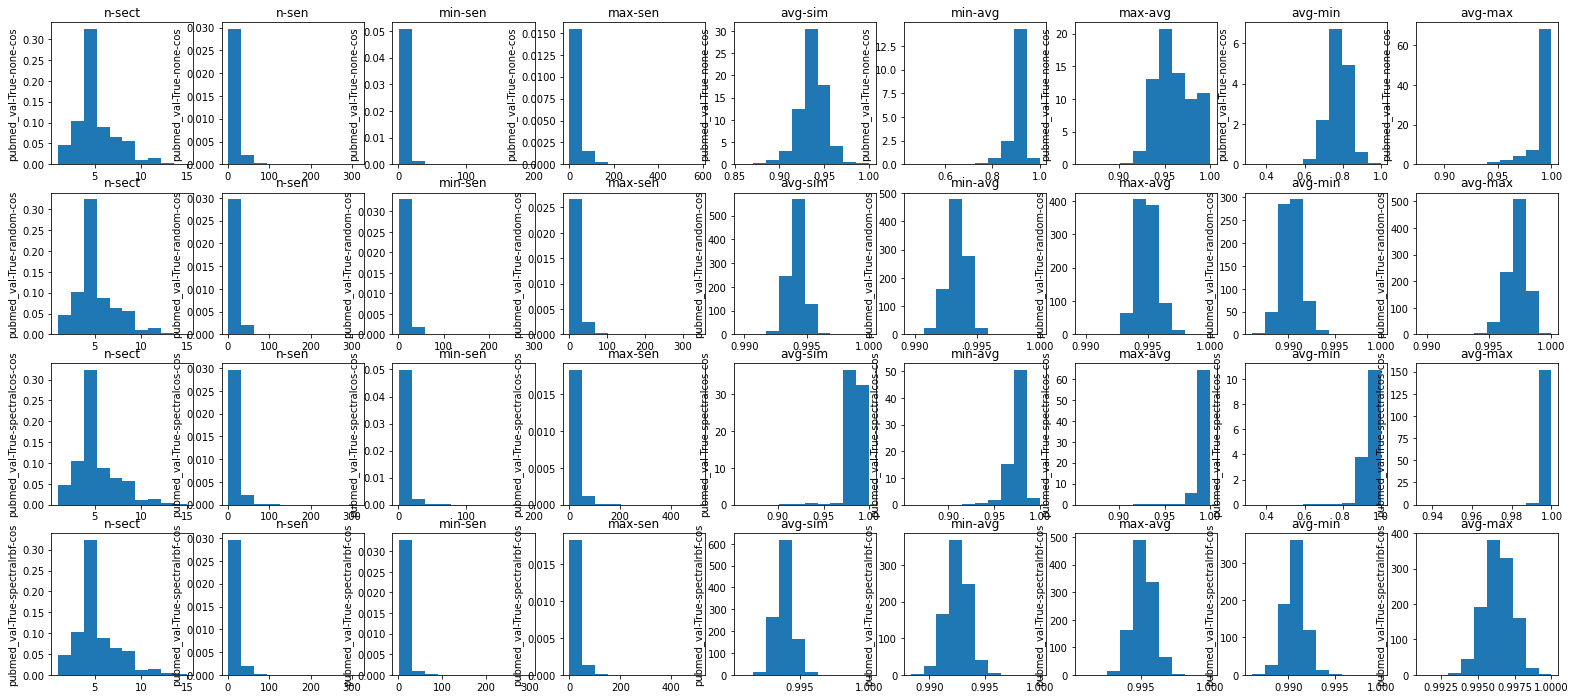

In [32]:
# plot histogram of each stat distribution
fig, axes = plt.subplots(len(stats), len(headers), figsize=(3 * len(headers), 3 * len(stats)))
for (k, v), ax in zip(stats.items(), axes):
    for h, i, a in zip(headers, v, ax):
        a.set_title(h)
        a.set_ylabel(k)
        a.hist(i, density=True)